## Laboratorio 01 - Programación Lineal

### Ejercicio 01

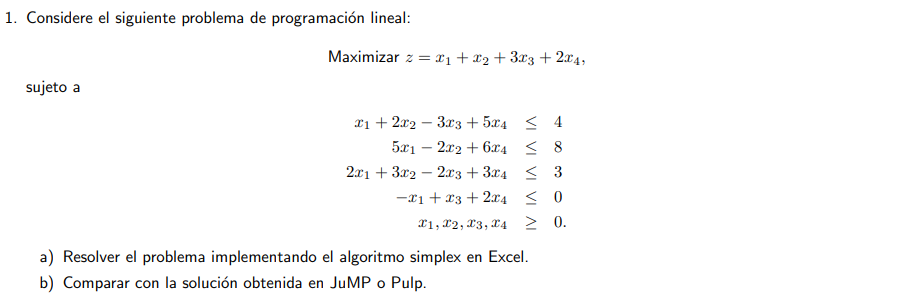

In [1]:
using JuMP
using HiGHS
using Ipopt
using Optimization

In [2]:
model = Model()

A JuMP Model
├ solver: none
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 0
├ num_constraints: 0
└ Names registered in the model: none

In [3]:
@variable(model, x1 >= 0, Int)
@variable(model, x2 >= 0, Int)
@variable(model, x3 >= 0, Int)
@variable(model, x4 >= 0, Int)

x4

In [4]:
@constraint(model, x1 + 2x2 - 3x3 + 5x4 <= 4)
@constraint(model, 5x1 - 2x2 + 6x4 <= 8)
@constraint(model, 2x1 + 3x2 - 2x3 + 3x4 <= 3)
@constraint(model, -x1 + x3 + 2x4 <= 0)

-x1 + x3 + 2 x4 <= 0

In [5]:
@objective(model, Max, x1 + x2 + 3x3 + 2x4)

x1 + x2 + 3 x3 + 2 x4

In [6]:
set_optimizer(model, HiGHS.Optimizer)

In [7]:
model

A JuMP Model
├ solver: HiGHS
├ objective_sense: MAX_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 4
├ num_constraints: 12
│ ├ AffExpr in MOI.LessThan{Float64}: 4
│ ├ VariableRef in MOI.GreaterThan{Float64}: 4
│ └ VariableRef in MOI.Integer: 4
└ Names registered in the model
  └ :x1, :x2, :x3, :x4

In [8]:
optimize!(model)

Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 4 rows; 4 cols; 14 nonzeros; 4 integer variables (0 binary)
Coefficient ranges:
  Matrix [1e+00, 6e+00]
  Cost   [1e+00, 3e+00]
  Bound  [0e+00, 0e+00]
  RHS    [3e+00, 8e+00]
Presolving model
4 rows, 4 cols, 14 nonzeros  0s
4 rows, 3 cols, 10 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   4 rows
   3 cols (0 binary, 3 integer, 0 implied int., 0 continuous, 0 domain fixed)
   10 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; J => Feasibility jump;
     H => Heuristic; L => Sub-MIP; P => Empty MIP; R => Randomized rounding; Z => ZI Round;
     I => Shifting; S => Solve LP; T => Evaluate node; U => Unbounded; X => User solution;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |      

In [9]:
println("Optimal solution:")
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("x3 = ", value(x3))
println("x4 = ", value(x4))

println("Optimal objective value: ", objective_value(model))

Optimal solution:
x1 = 2.0
x2 = 1.0
x3 = 2.0
x4 = 0.0
Optimal objective value: 9.0
